<a href="https://colab.research.google.com/github/uzonyiadam/image-recognition-coreml-stitch/blob/master/2020_05_01_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data as data

In [ ]:
batch_length = 32  # batches of 32 images are processed and averaged out
size = [28, 28, 1]  # the size of the image
num_iteration = 1500
info_freq = 100
eval_freq = 1000
num_classes = 10  # the number of possible output classes
learning_rate = 1e-4
num_kernels = [32, 64, 128]  # a list that defines the number of layers and convolutions for our network

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.p

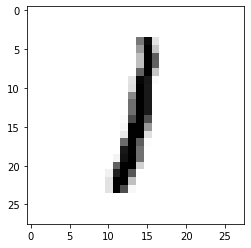

In [ ]:
tf.reset_default_graph()

# loading MNIST data and preprocessing
mnist_data = data.read_data_sets('/MNIST_data', one_hot=True)

# show an image just to get a sense of what we are dealing with here
img = np.reshape(mnist_data.train.images[4, :], [28, 28])
print(mnist_data.train.images.shape)
plt.imshow(img, cmap="Greys")
plt.show()

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Starting training...

Step: 100 Loss: 1.9307609 Accuracy: 0.53125
Step: 200 Loss: 1.1407299 Accuracy: 0.78125
Step: 300 Loss: 0.6329318 Accuracy: 0.875
Step: 400 Loss: 0.5808958 Accuracy: 0.875
Step: 500 Loss: 0.65509224 Accuracy: 0.84375
Step: 600 Loss: 0.37612465 Accuracy: 0.9375
Step: 700 Loss: 0.26307425 Accuracy: 0.9375
Step: 800 Loss: 0.33511436 Accuracy: 0.90625
Step: 900 Loss: 0.16129448 Accuracy: 0.96875
Step: 1000 Loss: 0.23969844 Accuracy: 0.90625
Step: 1100 Loss: 0.31508887 Acc

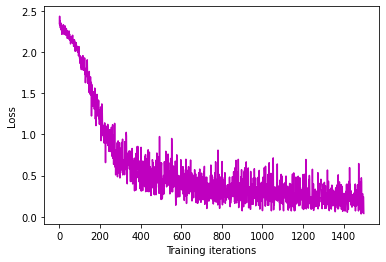

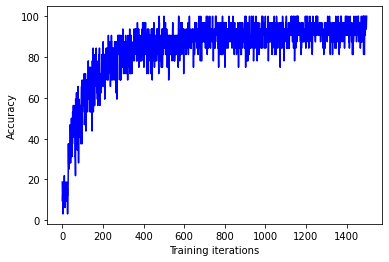

Training finished!

Running on independent test set...
0.001
0.934
0.908
0.912
0.91
0.924
0.953
0.955
0.96
0.972
Accuracy on independent test set: 0.9363


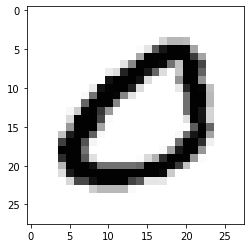

Label:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network output:  [[10.655179   -5.1756372  -0.32711363 -7.1849256  -7.3014097   1.1066465
  -1.3692548  -3.3992424  -4.876407   -6.1526837 ]]
Label vs. predicition:  0 , 0


In [ ]:


# defining arrays for our plots
loss_plot = np.zeros(num_iteration)
acc_plot = np.zeros(num_iteration)

input_data = tf.placeholder(tf.float32, [None] + size)  # input images

one_hot_labels = tf.placeholder(tf.float32, [None, num_classes])  # labels, the expected outputs
keep_prob=tf.placeholder_with_default(
    1.0,
    [],
    name='keep_prob'
)
current_input = input_data
current_filters = size[2]
layer_num = 0

# a loop to create all our layers
for num in num_kernels:
    with tf.variable_scope('conv' + str(layer_num)):
        layer_num += 1

        # variables we want to optimize
        w = tf.get_variable('w', [3, 3, current_filters, num])
        bias = tf.get_variable('bias', [num], initializer=tf.constant_initializer(0.0))

        # convolution
        conv_result = tf.nn.conv2d(current_input, w, strides=[1, 1, 1, 1], padding='VALID')
        current_filters = num

        # we add a bias
        conv_result = tf.add(conv_result, bias)

        relu = tf.nn.relu(conv_result)

        # pooling
        pooled = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        current_input = pooled

# we have generated feature maps; we will now use a fully connected layer with 10 neurons, one for each class
# the response of these neurons will represent how strongly the input belongs to the corresponding class
with tf.variable_scope('fully_connected'):
    current_shape = current_input.get_shape()
    
    current_input = tf.layers.batch_normalization(current_input)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    feature_length = int(current_shape[1] * current_shape[2] * current_shape[3])
    fully_connected = tf.reshape(current_input, [-1, feature_length])
    
    fully_connected = tf.nn.dropout(fully_connected,keep_prob=keep_prob)
    
    #dense = tf.matmul(dropped,W)+b
    w = tf.get_variable('w', [feature_length, num_classes])
    fully_connected = tf.matmul(fully_connected, w)
    bias = tf.get_variable('bias', [num_classes])
    fully_connected = tf.add(fully_connected, bias)

  ##?  is_train = tf.placeholder(tf.bool, name="is_train");
  #  print(fully_connected[1][0])
   # x_norm = tf.layers.batch_normalization(fully_connected)
    #print('Batch_Normalization...')
     #update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(one_hot_labels, fully_connected))

with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

with tf.name_scope('accuracy'): ##itt miért hoz létre új namescopeokat miért nem csak a variable scope-ba
    correct_predictions = tf.equal(tf.argmax(fully_connected, 1), tf.argmax(one_hot_labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32)) ##reduce mean miért kell a correct pr
 
    init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 0
    print('\nStarting training...\n')

    while step < num_iteration:
        used_in_batch= random.sample(range(mnist_data.train.images.shape[0]), batch_length)
        batch_xs = mnist_data.train.images[used_in_batch,:] 
        batch_ys = mnist_data.train.labels[used_in_batch,:]
        batch_xs = np.reshape(batch_xs,[batch_length]+size) #itt a + size imt jelent?
      
        _, acc, lo = sess.run([optimizer, accuracy, loss], feed_dict={input_data: batch_xs, one_hot_labels: batch_ys})
        loss_plot[step] = lo
        acc_plot[step] = acc * 100

        step += 1

        if step % info_freq == 0:
            print('Step: ' + str(step) + ' Loss: ' + str(lo) + ' Accuracy: ' + str(acc))
        
       
            #test_acc = sum_acc / mnist_data.test.images.shape[0]

            #print('\nAccuracy on independent test set at step ' + str(step) + ': ' + str(test_acc) + '\n')
    
            
    plt.figure()
    plt.plot(loss_plot, 'm')
    plt.xlabel('Training iterations')
    plt.ylabel('Loss')

    plt.figure()
    plt.plot(acc_plot, 'b')
    plt.xlabel('Training iterations')
    plt.ylabel('Accuracy')

    plt.show()
    
    print('Training finished!\n')
    print('Running on independent test set...')
    
    sum_acc = 0.0
    milacc= 0.0
    for i in range(0,mnist_data.test.images.shape[0]):
        batch_xs = mnist_data.test.images[i,:]
        batch_ys = mnist_data.test.labels[i,:]
        batch_xs = np.reshape(batch_xs,[1] + size)
        batch_ys = np.reshape(batch_ys,[1, num_classes])
        
        acc = sess.run(accuracy, feed_dict={input_data: batch_xs, one_hot_labels: batch_ys })
        #acc_plott[i] = acc
        milacc=milacc+acc
        if(i%1000==0):
          
          print(milacc/1000)
          milacc=0
          #print("Test accuracy"+str(acc*100))
        sum_acc += acc
  

    test_acc = sum_acc / mnist_data.test.images.shape[0]
    print('Accuracy on independent test set: ' + str(test_acc))
    
    test_index = random.sample(range(mnist_data.test.images.shape[0]), 1)
    test_image = np.reshape(mnist_data.test.images[test_index, :], (1, 28, 28, 1))
    test_label = mnist_data.test.labels[test_index, :]
    
    # show the image
    img = np.reshape(test_image, [28, 28])
    plt.imshow(img, cmap="Greys")
    plt.show()
    
    print('Label: ', test_label)
    result = sess.run(fully_connected, feed_dict={input_data: test_image, one_hot_labels: test_label})
    print('Network output: ', result)
    print('Label vs. predicition: ', np.argmax(test_label), ',', np.argmax(result))


Starting training...

Step: 100 Loss: 2.2876964 Accuracy: 0.1875
Step: 200 Loss: 2.1212955 Accuracy: 0.21875
Step: 300 Loss: 2.0199354 Accuracy: 0.21875
Step: 400 Loss: 1.5922486 Accuracy: 0.5625
Step: 500 Loss: 1.2311162 Accuracy: 0.65625
Step: 600 Loss: 1.5103728 Accuracy: 0.40625
Step: 700 Loss: 1.4379019 Accuracy: 0.46875
Step: 800 Loss: 0.8897117 Accuracy: 0.71875
Step: 900 Loss: 0.91362894 Accuracy: 0.8125
Step: 1000 Loss: 0.84550273 Accuracy: 0.75
Step: 1100 Loss: 0.8791002 Accuracy: 0.6875
Step: 1200 Loss: 0.7426306 Accuracy: 0.78125
Step: 1300 Loss: 0.8719471 Accuracy: 0.75
Step: 1400 Loss: 0.70409864 Accuracy: 0.8125
Step: 1500 Loss: 0.57114315 Accuracy: 0.78125


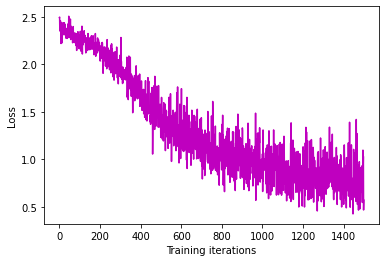

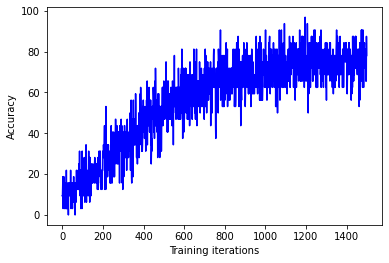

In [ ]:
with tf.Session() as sess:  
    sess.run(init)
    step = 0
    print('\nStarting training...\n')

    while step < num_iteration:
        used_in_batch= random.sample(range(mnist_data.train.images.shape[0]), batch_length)
        batch_xs = mnist_data.train.images[used_in_batch,:]
        batch_ys = mnist_data.train.labels[used_in_batch,:]
        batch_xs = np.reshape(batch_xs,[batch_length]+size) 
      
        _, acc, lo = sess.run([optimizer, accuracy, loss], feed_dict={input_data: batch_xs, one_hot_labels: batch_ys, keep_prob: 0.2})
        loss_plot[step] = lo
        acc_plot[step] = acc * 100

        step += 1

        if step % info_freq == 0:
            print('Step: ' + str(step) + ' Loss: ' + str(lo) + ' Accuracy: ' + str(acc))

plt.figure()
plt.plot(loss_plot, 'm')
plt.xlabel('Training iterations')
plt.ylabel('Loss')

plt.figure()
plt.plot(acc_plot, 'b')
plt.xlabel('Training iterations')
plt.ylabel('Accuracy')

plt.show()

 
       
            #test_acc = sum_acc / mnist_data.test.images.shape[0]

            #print('\nAccuracy on independent test set at step ' + str(step) + ': ' + str(test_acc) + '\n')